<center>
<h3>Universidade Federal do Rio Grande do Sul (UFRGS)<br>
Programa de Pós-Graduação em Engenharia Civil (PPGEC)<br>
PEC00144 - Métodos Experimentais em Engenharia Civil</h3>

<h1>Trabalho 4</h1>

<h3>Aluno: <a href="https://github.com/dutitello/">Eduarto Pagnussat Titello</a></h3>

</center>


Este trabalho tem por objetivo: 

- Definir (simular) um conjunto n de amostras de uma V.A. associada a carga (buscar máximo) ou resistência (buscar mínimo), independentes e com mesma distribuição de origem. 

- Calcular e graficar as distribuições de máxima (ou mínima) para alguns valores de $N$ (conforme o significado).


In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import jupyter2latex as j2l
from numpy import pi
import scipy.stats as st
import requests

# Conjunto de dados adotados

Para realização desse trabalho são adotados dados pluviométricos diários medidos na estação meteorológica do Jardim Botânico de Porto Alegre. O periodo de aquisição dos dados é de 01/01/1970 à 31/12/2020. Observa-se que os dados contabilizam todas as chuvas ocorridas durante o dia, não sendo adequados para alguns tipos de projeto. 

Os dados em questão são obtidos do Instituto Nacional de Meteorologia (INMET) através de uma API publica, conforme:

In [12]:
# Intervalo de dados:
ano_i = 1970
ano_f = 2020

# API do INMET
dados_api = f'https://apitempo.inmet.gov.br/estacao/diaria/{ano_i}-01-01/{ano_f}-12-31/83967'
# Copia local
dados_local = './dados.json'

# Capturando dados da estação de porto alegre de 1970 à 2020
if os.path.isfile(dados_local): 
    print('Usando dados locais')
    dados_origem = dados_local
else:
    print('Usando dados da API')
    dados_origem = requests.get(dados_api).text
    with open(dados_local, 'w') as f:
        f.write(dados_origem)
        print('Dados salvos localmente')
dados = pd.read_json(dados_origem)

# Ajustando indice para data de medição e configurando como data
j2l.df2table(dados[:7], label='tab:cabdados', caption='Cabeçalho dos dados brutos')

Usando dados locais


,TEMP_MAX,UMID_MED,UF,DT_MEDICAO,DC_NOME,TEMP_MED,CHUVA,INSOLACAO,CD_ESTACAO,VL_LATITUDE,VL_LONGITUDE,TEMP_MIN
0,28.9,83.50,RS,1970-01-01,PORTO ALEGRE,24.50,17.2,2.2,83967,-30.053611,-51.174722,22.0
1,31.4,73.00,RS,1970-01-02,PORTO ALEGRE,26.76,0.0,8.8,83967,-30.053611,-51.174722,22.4
2,35.0,70.50,RS,1970-01-03,PORTO ALEGRE,27.32,0.0,10.5,83967,-30.053611,-51.174722,22.8
3,31.6,78.00,RS,1970-01-04,PORTO ALEGRE,27.52,0.4,4.0,83967,-30.053611,-51.174722,23.8
4,34.1,75.75,RS,1970-01-05,PORTO ALEGRE,27.66,0.0,9.2,83967,-30.053611,-51.174722,23.4
5,34.3,83.00,RS,1970-01-06,PORTO ALEGRE,27.98,0.0,6.8,83967,-30.053611,-51.174722,23.6
6,30.2,79.25,RS,1970-01-07,PORTO ALEGRE,25.88,1.3,6.5,83967,-30.053611,-51.174722,24.0


Na tabela \ref{tab:cabdados} observa-se a presença de diversas informações meteorológicas sobre cada dia, além de informações sobre a estação. Para realização do trabalho são mantidas apenas os anos, meses e volumes diários de chuvas. Agrupando os dados por ano pode ser determinada para cada ano sua máxima precipitação diária, os valores para os últimos 5 anos são apresentados na tabela \ref{tab:ultmax}, enquanto todas as máximas podem ser encontradas no final do trabalho na tabela \ref{tab:todasmax}.

In [13]:
# FIltrando apenas datas e chuvas
datas = pd.DatetimeIndex(dados['DT_MEDICAO'])

chuvas = pd.DataFrame()
chuvas['ANO'] = datas.year
chuvas['MES'] = datas.month
chuvas['CHUVA'] = dados['CHUVA']
chuvas.set_index(['ANO','MES'], inplace=True)
chuvas.dropna(inplace=True)

# Apaga da memoria já que não vou mais precisar
dados = None

# Captura máximos anuais (poderia ser mensal com by=['ANO','MES'])
chuvas_agr = chuvas.groupby(by='ANO')
chuvas_max = chuvas_agr.max()
j2l.df2table(chuvas_max[-5::1], label='tab:ultmax', caption='Máximas dos últimos 5 anos')

,CHUVA
ANO,
2016,73.6
2017,90.6
2018,50.7
2019,79.4
2020,109.9


# Análise estatística dos dados



Plotando as máximas precipitações diárias anuais em forma de histograma é observado o formato de distribuição de valores extremos para máximos, o que é esperado visto que apenas valores de máximo estão sendo considerados. 

Text(0.5, 0, 'Máxima precipitação diária por ano [mm]')

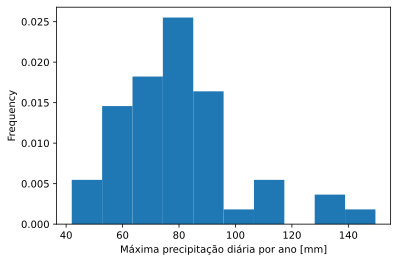

In [15]:
plt.figure(figsize=(6,4))
chuvas_max['CHUVA'].plot(kind='hist', density=True, bins=10)
plt.xlabel('Máxima precipitação diária por ano [mm]')

Ajustando aos dados distribuições de extremos de Gumbel e Frechét para máximos, observa-se que plotando as PDFs e CDFs sobre os histogramas a que apresenta melhor ajuste é a distribuição de Gumbel. 

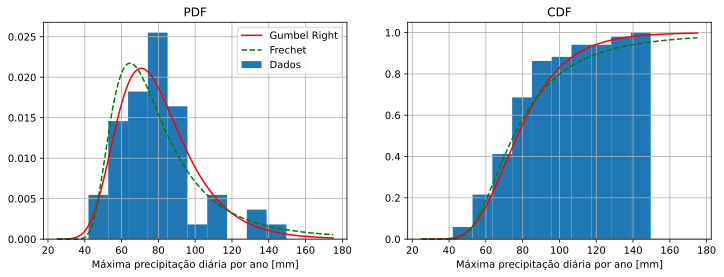

In [16]:
# Ajusta distribuição de Gumbel para máximo
gumb_loc, gumb_scl = st.gumbel_r.fit(chuvas_max['CHUVA'])
d_gumbel = st.gumbel_r(gumb_loc, gumb_scl)

# Ajusta distribuição de Frechet para máximo
frec_c, frec_loc, frec_scl = st.invweibull.fit(chuvas_max['CHUVA'])
d_frechet = st.invweibull(frec_c, frec_loc, frec_scl)

x = np.linspace(25, 175, 300)
plt.figure(figsize=[12,4])

pdf = plt.subplot(1,2,1)
pdf.set_title('PDF')
pdf.hist(chuvas_max['CHUVA'], density=True, bins=10, label='Dados')
pdf.plot(x, d_gumbel.pdf(x), '-r', label='Gumbel Right')
pdf.plot(x, d_frechet.pdf(x), '--g', label='Frechet')
pdf.set_xlabel('Máxima precipitação diária por ano [mm]')
pdf.legend(loc='upper right')
pdf.grid()

cdf = plt.subplot(1,2,2)
cdf.set_title('CDF')
cdf.hist(chuvas_max['CHUVA'], density=True, bins=10, cumulative=True, label='Dados')
cdf.plot(x, d_gumbel.cdf(x), '-r', label='Gumbel Right')
cdf.plot(x, d_frechet.cdf(x), '--g', label='Frechet')
cdf.set_xlabel('Máxima precipitação diária por ano [mm]')
cdf.grid()

Onde os parâmetros estatísticos dos máximos são:

In [17]:
media = chuvas_max['CHUVA'].mean()
desvp = chuvas_max['CHUVA'].std()
coefv = desvp/media

j2l.print(f'''

- Média $\mu={media:.2f} mm$

- Desvio padrão $\sigma={desvp:.2f} mm$

- Coeficiente de variação $\delta={coefv:.3f}$

''')

- Média $\mu=80.51 mm$

- Desvio padrão $\sigma=22.02 mm$

- Coeficiente de variação $\delta=0.274$

# Construção das distribuições de valores extremos

Conhecida a distribuição dos dados podem ser construídas as respectivas distribuições de valores extremos para diferentes valores de $N$, onde $N$ é o periodo de retorno em anos.

In [18]:
class Xtreme_NN(st.rv_continuous):
    def __init__(self, X, N):
        self.N = N
        self.X = X
        st.rv_continuous.__init__(self)

    def _cdf(self, x):
        return (self.X.cdf(x))**self.N

Para:

- $N=1$ $\rightarrow$ $\mu=80.73mm$ e $\sigma=22.36mm$

- $N=2$ $\rightarrow$ $\mu=92.82mm$ e $\sigma=22.36mm$

- $N=5$ $\rightarrow$ $\mu=108.80mm$ e $\sigma=22.36mm$

- $N=10$ $\rightarrow$ $\mu=120.88mm$ e $\sigma=22.36mm$

- $N=25$ $\rightarrow$ $\mu=136.86mm$ e $\sigma=22.36mm$

- $N=50$ $\rightarrow$ $\mu=148.95mm$ e $\sigma=22.36mm$

- $N=100$ $\rightarrow$ $\mu=161.03mm$ e $\sigma=22.36mm$

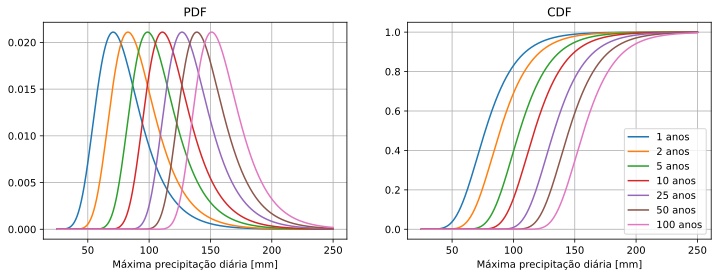

In [19]:
x = np.linspace(25, 250, 400)
plt.figure(figsize=(12,4))

pdf = plt.subplot(1,2,1)
cdf = plt.subplot(1,2,2)

pdf.set_title('PDF')
cdf.set_title('CDF')
pdf.set_xlabel('Máxima precipitação diária [mm]')
cdf.set_xlabel('Máxima precipitação diária [mm]')

j2l.print('Para:')
for N in [1, 2, 5, 10, 25, 50, 100]:
    pdf.plot(x, Xtreme_NN(d_gumbel, N).pdf(x), label=f'{N} anos')
    cdf.plot(x, Xtreme_NN(d_gumbel, N).cdf(x), label=f'{N} anos')

    mu, sig = Xtreme_NN(d_gumbel, N).mean(), Xtreme_NN(d_gumbel, N).std()
    j2l.print(f'- $N={N}$ $\\rightarrow$ $\mu={mu:.2f}mm$ e $\sigma={sig:.2f}mm$')

cdf.legend(loc='lower right')
pdf.grid()
cdf.grid()

Observa-se que quanto maior o periodo de retorno $N$ maior a média da distribuição, todavia, o valor do desvio padrão é constante dada a perpetualidade das distribuições assintóticas de extremos. 

# Apêndice

In [20]:
j2l.df2table(chuvas_max, label='tab:todasmax', caption='Máximas anuais')

,CHUVA
ANO,
1970,107.7
1971,55.4
1972,89.4
1973,61.6
1974,135.4
1975,56.3
1976,66.7
1977,81.3
1978,44.4
